In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력
print(len(x_test))

2.4.1
60000
10000


### x, y??

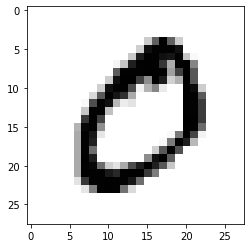

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary) # plt imshow : bgr , cmap = plt.cm.binary : gray scale . cmap = 'gray'도 동일
plt.show()

In [3]:
print(y_train[1]) #label

0


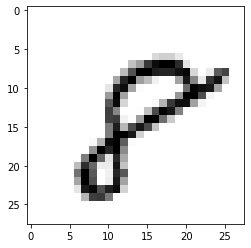

60000 번째 이미지의 숫자는 바로  8 입니다.


In [4]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=59999     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [5]:
print(x_train.shape) #train datasets size : 28X28 , 60000

(60000, 28, 28)


In [6]:
print(x_test.shape) #test datasets size : 28X28 , 10000

(10000, 28, 28)


In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


### When you wanna train your own model, then it would be better to nomalize input datas. (only input!!!)

In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


### LeNet using keras

In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1))) #filter , kernel
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # number of class.y 

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

### Train the model

In [11]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10) #epoch : train times   , epoch : underfitting , overfitting

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4101 - accuracy: 0.8749
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0485 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0386 - accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0304 - accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0236 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0197 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0176 - accuracy: 0.9943
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0145 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.010

#### accuracy is getting increased over epochs

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=1) #verbose : how detailed the output is . [0] :nothing , [1] : progress bar [2]show loss every mini batchs
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 [==============================] - 2s 5ms/step - loss: 0.0381 - accuracy: 0.9888
test_loss: 0.038080498576164246 
test_accuracy: 0.9887999892234802


### Use model.predict if you wannna know about each predicted probability

In [14]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [3.3474887e-08 5.6146421e-09 1.9895435e-07 2.9512057e-06 3.0941347e-10
 2.9342002e-09 2.5108623e-19 9.9999678e-01 1.0808660e-09 2.0747430e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


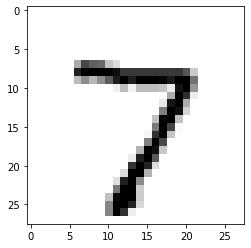

In [15]:
plt.imshow(x_test[idx],cmap=plt.cm.binary) #7.. Good prediction
plt.show()

### Wrong predictions

예측확률분포: [1.4309099e-05 5.0678063e-04 9.7272104e-01 1.2494363e-03 6.2427230e-06
 6.9033829e-03 2.5329265e-11 1.5352961e-03 1.6932197e-02 1.3131915e-04]
라벨: 8, 예측결과: 2


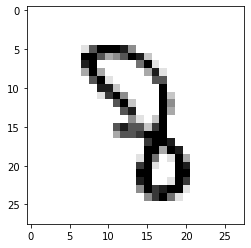

예측확률분포: [5.5142156e-08 1.0974259e-03 1.6225843e-03 2.5491910e-05 5.2030128e-07
 3.0666557e-05 1.4272401e-11 9.6152544e-02 9.0084112e-01 2.2959859e-04]
라벨: 7, 예측결과: 8


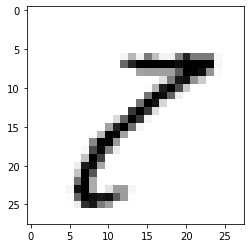

예측확률분포: [1.4953266e-06 2.1311222e-03 9.4771880e-01 2.8098567e-04 2.0999867e-02
 4.0747836e-06 6.4857682e-07 8.2143466e-04 2.8041068e-02 5.1035710e-07]
라벨: 8, 예측결과: 2


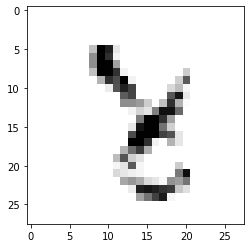

예측확률분포: [3.2370557e-14 9.0599196e-06 4.0712873e-08 9.8169367e-06 6.9690466e-01
 4.6892848e-05 8.0580811e-12 1.3531033e-04 3.0289355e-01 6.0997280e-07]
라벨: 8, 예측결과: 4


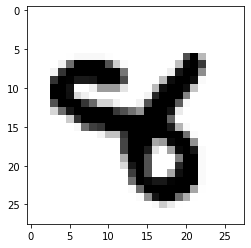

예측확률분포: [1.0498884e-06 5.1459777e-01 5.6206505e-03 4.2999836e-06 2.4221864e-02
 4.8642487e-05 3.0051162e-09 5.4967776e-03 7.2230550e-04 4.4928664e-01]
라벨: 9, 예측결과: 1


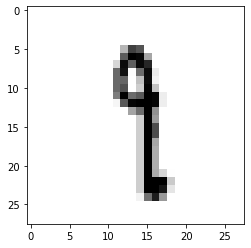

In [16]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### Make better network by changing hyper-parameters

수완님 코드 : 제너레이터 활용.

In [18]:
from tensorflow import keras
from itertools import product

mnist = keras.datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)
n_train_epoch=10

def get_model(n_channel_1, n_channel_2, n_dense):
    for channel_1, channel_2, dense in product(n_channel_1, n_channel_2, n_dense):
        model=keras.models.Sequential()
        model.add(keras.layers.Conv2D(channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
        model.add(keras.layers.MaxPool2D(2,2))
        model.add(keras.layers.Conv2D(channel_2, (3,3), activation='relu'))
        model.add(keras.layers.MaxPooling2D((2,2)))
        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dense(dense, activation='relu'))
        model.add(keras.layers.Dense(10, activation='softmax'))

        model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
        yield model, [channel_1, channel_2, dense]

n_channel_1 = [16, 32, 64]
n_channel_2 = [32, 64, 128]
n_dense = [32, 64, 128]

best_test_acc = 0
best_args = []

iter_time = 1

for model, args in get_model(n_channel_1, n_channel_2, n_dense):
    print("{}번째 조합".format(iter_time))
    iter_time += 1
    model.fit(train_x, train_y, epochs=n_train_epoch)

    test_loss, test_accuracy = model.evaluate(test_x, test_y, verbose=2)
    print(f"test_loss: {test_loss} ")
    if test_accuracy > best_test_acc:
        best_test_acc = test_accuracy
        best_args = args
        print("BEST!!!")
    print(f"channel_1 : {args[0]} channel_2 : {args[1]} dense : {args[2]} test_accuracy: {test_accuracy}")

1번째 조합
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4515 - accuracy: 0.8599
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0676 - accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0471 - accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0277 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0254 - accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0192 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0165 - accuracy: 0.9950
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0130 - accuracy: 0.9957
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss

test_loss: 0.041626036167144775 
channel_1 : 16 channel_2 : 128 dense : 32 test_accuracy: 0.9894000291824341
8번째 조합
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3182 - accuracy: 0.9078
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0459 - accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0282 - accuracy: 0.9910
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0227 - accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0158 - accuracy: 0.9947
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0112 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0084 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0054 - accuracy: 0.9983
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step 

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0059 - accuracy: 0.9981
313/313 - 1s - loss: 0.0353 - accuracy: 0.9910
test_loss: 0.035275958478450775 
channel_1 : 32 channel_2 : 64 dense : 64 test_accuracy: 0.9909999966621399
15번째 조합
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2874 - accuracy: 0.9132
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0418 - accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0280 - accuracy: 0.9913
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0190 - accuracy: 0.9935
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0131 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - accuracy: 0.9969
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0069 - accuracy: 0.9980
Epoch 8/10
1875/1875 [==========

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0072 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0062 - accuracy: 0.9981
313/313 - 1s - loss: 0.0336 - accuracy: 0.9909
test_loss: 0.03356315940618515 
channel_1 : 64 channel_2 : 32 dense : 128 test_accuracy: 0.9908999800682068
22번째 조합
Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.3294 - accuracy: 0.8971
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0539 - accuracy: 0.9829
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0344 - accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0256 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0186 - accuracy: 0.9938
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0166 - accuracy: 0.9947
Epoch 7/10
1875/1875 [========

---

### R , P , S classifier 

In [19]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### Image resizing

In [21]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")   #path내의 jpg 형식 파일명을 모두 images에 저장
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS) #anti aliasing
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [22]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [23]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")   #path내의 jpg 형식 파일명을 모두 images에 저장
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS) #anti aliasing
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


### Data load, labeling

In [39]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color) #300X28X28X3
    labels=np.zeros(number_of_data,dtype=np.int32) #300X1

    idx=0
    
    '''
    folder_list = os.listdir(img_path) #os.listdir로 폴더 명 추출 ==> 그 다음에?? 폴더 명이 순서대로 반환되지 않으므로 폴더명 정렬 또는 확인 필요
    #1. 정규 표현식(re) 활용해서 정렬하기
    #2. '/' 기준 스플릿 후 [-1]에 접근한 다음에 if문으로 처리
    
    for folder in folder_list :
        img_current_path = os.path.join(img_path,folder)
        print(img_cur_path)
        
        for file in glob.iglob(img_cur_path+"/*.jpg"):
            pass
    '''   
               
        
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


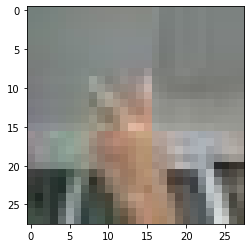

In [40]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0]) ##28x28 img 

## My model

In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요? 

#rgb datasets : 3 channel

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3))) #filter , kernel
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # number of class.y 

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_67 (Dense)             

In [43]:
print(x_train.shape) #train datasets size : 28X28 , 300

(300, 28, 28, 3)


In [48]:
print('최소값: {0},  최대값: {1}'.format(np.min(x_train), np.max(x_train)))

최소값: 0,  최대값: 242


#### input data normalizaion

In [49]:
x_train_norm = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train)) #min-max normalization

In [50]:
print('최소값: {0},  최대값: {1}'.format(np.min(x_train_norm), np.max(x_train_norm)))

최소값: 0.0,  최대값: 1.0
